Uso de Cox para analizar datos de supervivencia y explorar la relación entre la supervivencia y una o más variables explicativas.

In [1]:
# Importar las librerías necesarias
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

In [2]:
# Crear un dataframe con datos ficticios
data = {
    'pid': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'edad': [50, 60, 45, 70, 65, 55, 62, 59, 47, 52],  # Edad del paciente
    'tratamiento': [1, 1, 0, 1, 0, 0, 1, 0, 1, 0],      # Tratamiento: 1 = sí, 0 = no
    'tiempo': [5, 6, 6, 2, 4, 3, 6, 8, 4, 7],           # Tiempo de supervivencia en meses
    'evento': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]           # 1 si el evento (muerte) ocurrió, 0 si está censurado
}
df = pd.DataFrame(data)

# Mostrar los primeros registros del dataframe
df.head()

,pid,edad,tratamiento,tiempo,evento
0,1,50,1,5,1
1,2,60,1,6,0
2,3,45,0,6,1
3,4,70,1,2,1
4,5,65,0,4,0


In [3]:
# Crear una instancia del modelo de Cox
cph = CoxPHFitter()

# Ajustar el modelo a los datos
cph.fit(df, duration_col='tiempo', event_col='evento', formula="edad + tratamiento")

# Imprimir el resumen del modelo
summary_df = cph.summary
selected_columns = summary_df[['coef', 'exp(coef)', 'se(coef)', 'p']]

# Mostrar el resumen filtrado
selected_columns

,coef,exp(coef),se(coef),p
covariate,,,,
edad,-0.056714,0.944864,0.070490,0.421068
tratamiento,0.730815,2.076773,0.962321,0.447595


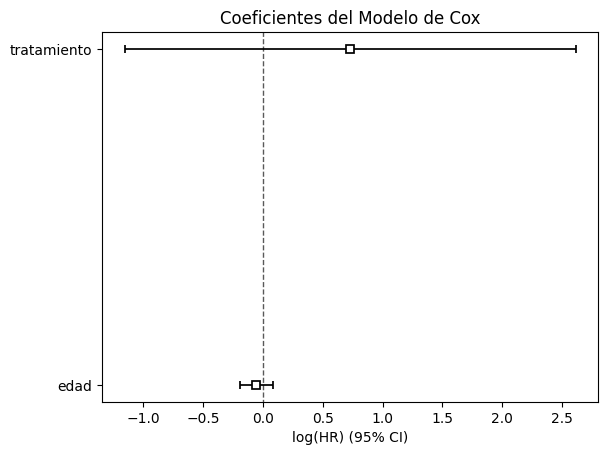

In [4]:
# Graficar los coeficientes de regresión
cph.plot()
plt.title('Coeficientes del Modelo de Cox')
plt.show()